In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.neighbors import NearestNeighbors


In [2]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    A=0
    for x in unique_list: 
        A=A+1 
    print (A)

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ydafalla/EECS731-Final-Project/master/final.csv' , low_memory = False)
dataset.head()

,Unnamed: 0,Passwords,length,Has_Upper,Has_Numeric,Has_SpecialChar,UpperCase_Count,LowerCase_Count,Numeric_Count,SpecialChar_Count,Alphabet_Count,Password_Source,Has_Word,Has_Name,Has_Place,Score,Password_Strength
0,0,@fl!pm0de@,10,0,1,1,0,6,1,3,6,Yahoo,0,0,0,5,Strong
1,1,pass,4,0,0,0,0,4,0,0,4,Yahoo,0,0,1,1,Weak
2,2,steveol,7,0,0,0,0,7,0,0,7,Yahoo,0,1,0,2,Weak
3,3,chotzi,6,0,0,0,0,6,0,0,6,Yahoo,0,1,0,1,Weak
4,4,lb2512,6,0,1,0,0,2,4,0,2,Yahoo,0,0,0,3,Medium


In [4]:
LE = LabelEncoder()
##
dataset['Password_Strength'] = LE.fit_transform(dataset['Password_Strength'].astype('str'))
dataset['Password_Source'] = LE.fit_transform(dataset['Password_Source'].astype('str'))
##
#
final_df = dataset.loc[:,['length' , 'UpperCase_Count', 'LowerCase_Count', 'Numeric_Count', 'SpecialChar_Count', 'Alphabet_Count', 'Has_Numeric' , 'Has_Upper' , 'Score']]
#final_df = dataset.loc[:,['Password_Source']]


In [5]:
# dataset['length'] = dataset['length']/dataset['length'].max()
# dataset['Numeric_Count'] = dataset['Numeric_Count']/dataset['Numeric_Count'].max()
# dataset['SpecialChar_Count'] = dataset['SpecialChar_Count']/dataset['SpecialChar_Count'].max()
# dataset['Alphabet_Count'] = dataset['Alphabet_Count']/dataset['Alphabet_Count'].max()
# dataset.head()

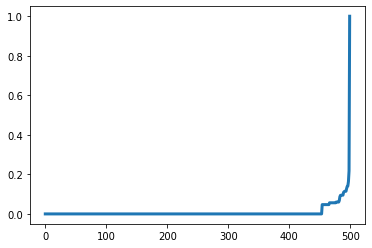

In [6]:
dataset['length'] = dataset['length']/dataset['length'].max()
dataset['Numeric_Count'] = dataset['Numeric_Count']/dataset['Numeric_Count'].max()
dataset['SpecialChar_Count'] = dataset['SpecialChar_Count']/dataset['SpecialChar_Count'].max()
dataset['Alphabet_Count'] = dataset['Alphabet_Count']/dataset['Alphabet_Count'].max()


D_S=dataset.sample(500)
D_S= D_S.iloc[:,[2,3,4,5,8,9,10]].values

nbrs = NearestNeighbors(n_neighbors =2 , algorithm='ball_tree').fit(D_S)
distances , indices = nbrs.kneighbors (D_S)
distances = np.sort(distances , axis = 0)
distances = distances[:,1]
plt.plot(distances , linewidth=3)
plt.show()

In [7]:
X=dataset.sample(5000)
original = X.copy()
X = X.iloc[:,[2,3,4,5,8,9,10]].values
norm_data = MinMaxScaler()   # initialization
X = norm_data.fit_transform(X)

In [8]:
eps_range = [x / 100.0 for x in range(1,30,2)]
eps_scores_1 = []
n_clusters_1 = []
for e in tqdm (eps_range):
  dbscan = DBSCAN(eps=e, min_samples=30)
  labels = dbscan.fit_predict(X)
  eps_scores_1.append(metrics.silhouette_score(X,labels))
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_clusters_1.append(n_clusters)


eps_range = [x / 100.0 for x in range(1,30,2)]
eps_scores_2 = []
n_clusters_2 = []
for e in tqdm (eps_range):
  dbscan = DBSCAN(eps=e, min_samples=100)
  labels = dbscan.fit_predict(X)
  eps_scores_2.append(metrics.silhouette_score(X,labels))
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_clusters_2.append(n_clusters)
                      
                      
eps_range = [x / 100.0 for x in range(1,30,2)]
eps_scores_3 = []
n_clusters_3 = []
for e in tqdm (eps_range):
  dbscan = DBSCAN(eps=e, min_samples=200)
  labels = dbscan.fit_predict(X)
  eps_scores_3.append(metrics.silhouette_score(X,labels))
  n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
  n_clusters_3.append(n_clusters)    

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:12<00:00,  1.17it/s]


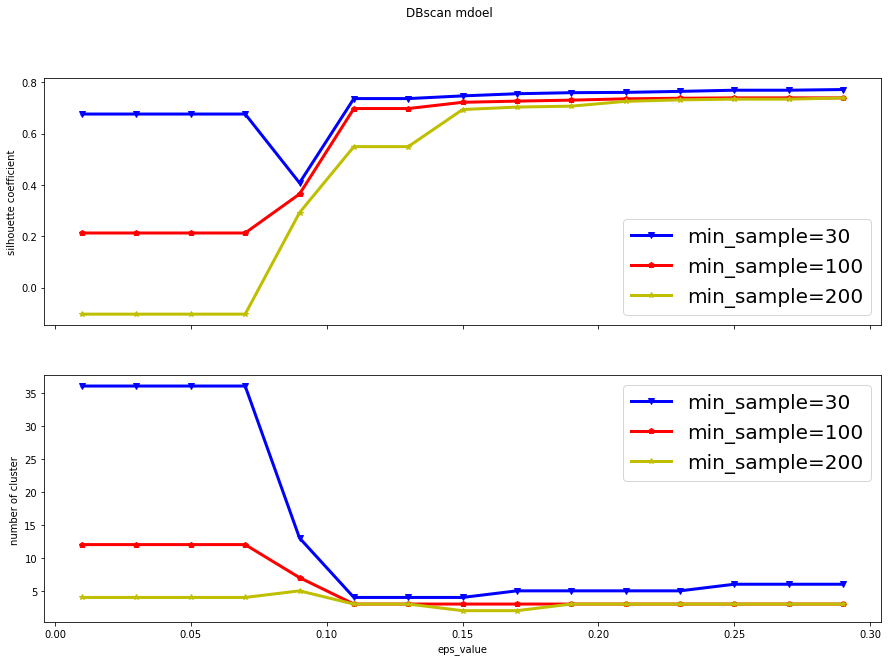

In [9]:
fig , axs = plt.subplots(2, sharex = True , figsize = (15,10))
fig.suptitle ('DBscan mdoel')

axs[0].plot (eps_range,eps_scores_1 , color ='b', marker='v' , linewidth=3, label='min_sample=30')
axs[0].plot (eps_range,eps_scores_2 , color ='r', marker='p' , linewidth=3, label='min_sample=100')
axs[0].plot (eps_range,eps_scores_3 , color ='y', marker='*' , linewidth=3, label='min_sample=200')
axs.flat[0].set(ylabel = 'silhouette coefficient')
axs[1].plot (eps_range,n_clusters_1, color='b', marker='v' , linewidth=3, label='min_sample=30')
axs[1].plot (eps_range,n_clusters_2, color='r', marker='p' , linewidth=3, label='min_sample=100')
axs[1].plot (eps_range,n_clusters_3, color='y', marker='*' , linewidth=3, label='min_sample=200')
axs.flat[1].set(ylabel = 'number of cluster ')
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
plt.xlabel('eps_value')


plt.show()

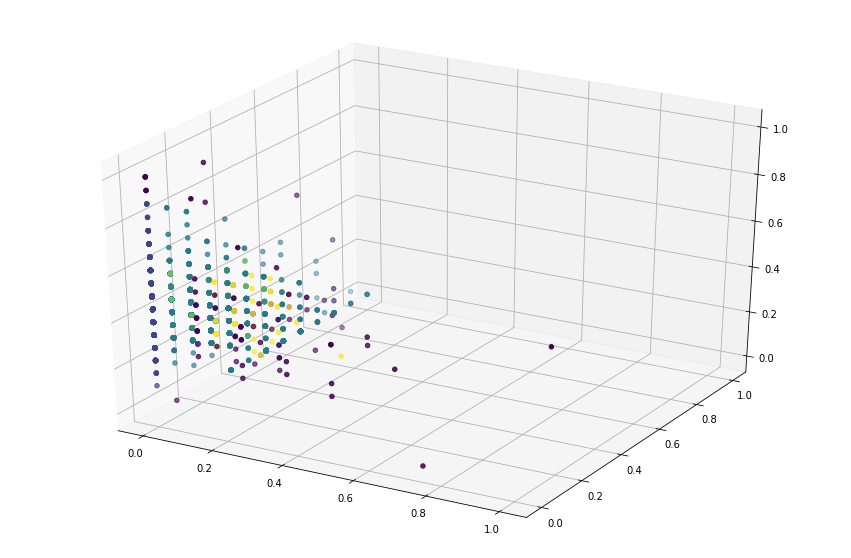

number of cluster is:  5


In [20]:
from mpl_toolkits.mplot3d import Axes3D
dbscan = DBSCAN (eps=0.2,min_samples=30)
model = dbscan.fit(X)
fig = plt.figure(figsize=(15,10)) 
ax = fig.add_subplot(111, projection ='3d') 
ax.scatter(X[:,5] , X[:,4],X[:,6], c= model.labels_)
plt.show()
label = model.labels_
n_cluster = len(set(label)) - (1 if -1 in label else 0)
n_noise_ = list(label).count(-1)
print('number of cluster is: ',n_cluster)

#dataset_new = pd.DataFrame(X)
#dataset_new['clusters']= labels

original['clusters']= label
original['clusters']=original['clusters']+1
compare = original.iloc[:,[15,17]]

In [11]:
n_clusters = len(set(label)) - (1 if -1 in label else 0)

print( metrics.silhouette_score(X,label))



print(compare['Score'].sort_values(ascending=False).unique())
print(compare['clusters'].sort_values(ascending=False).unique())


info_1 = compare.groupby('Score').size()
info_2 = compare.groupby('clusters').size()

0.7605535198013093
[5 4 3 2 1]
[5 4 3 2 1 0]


In [12]:
counter1 = counter2 = counter3 = counter4 =  counter5 =  0
for row in original["Score"]:
    if row == 1:
        counter1 = counter1 + 1
    elif row == 2:
        counter2 = counter2 + 1
    elif row == 3:
        counter3 = counter3 + 1
    elif row == 4:
        counter4 = counter4 + 1
    else:
        counter5 = counter5 + 1
print(counter3)
Scores = [counter1 , counter2 , counter3 , counter4 , counter5]
#Scores.sort()

2317


In [13]:

cluster1 = cluster2 = cluster0 = cluster3 = cluster4 = 0

for row in original["clusters"]:
    if row == 1:
        cluster1 = cluster1 + 1
    elif row == 2:
        cluster2 = cluster2 + 1
    elif row == 3:
        cluster3 = cluster3 + 1
    elif row == 4:
        cluster4 = cluster4 + 1
    else:
        cluster0 = cluster0 + 1
Cluster = [cluster4, cluster0, cluster2, cluster1, cluster3]
#Cluster.sort()

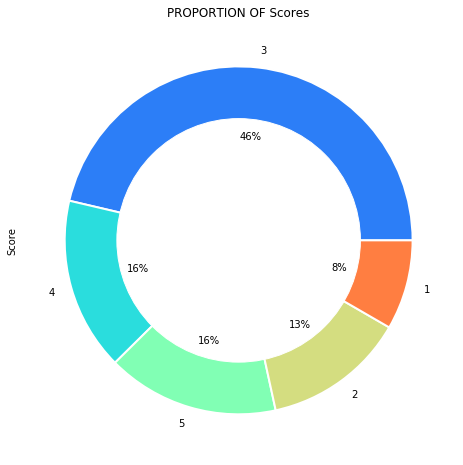

In [14]:

plt.figure(figsize=(8,8))
original["Score"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Scores")
plt.show()

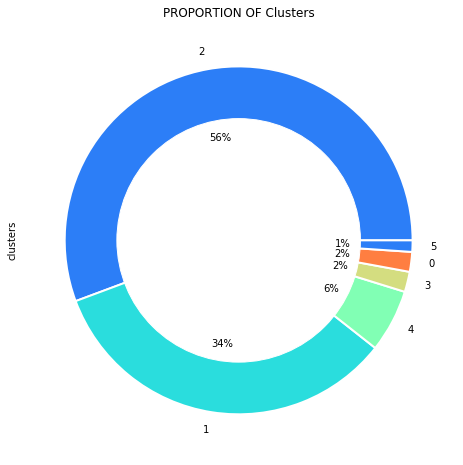

In [15]:
plt.figure(figsize=(8,8))
original["clusters"].value_counts().plot.pie(autopct = "%1.0f%%",
                                             colors =sns.color_palette("rainbow",5),
                                             wedgeprops = {"linewidth":2,"edgecolor":"white"})
my_circ = plt.Circle((0,0),.7,color = "white")
plt.gca().add_artist(my_circ)
plt.title("PROPORTION OF Clusters")
plt.show()

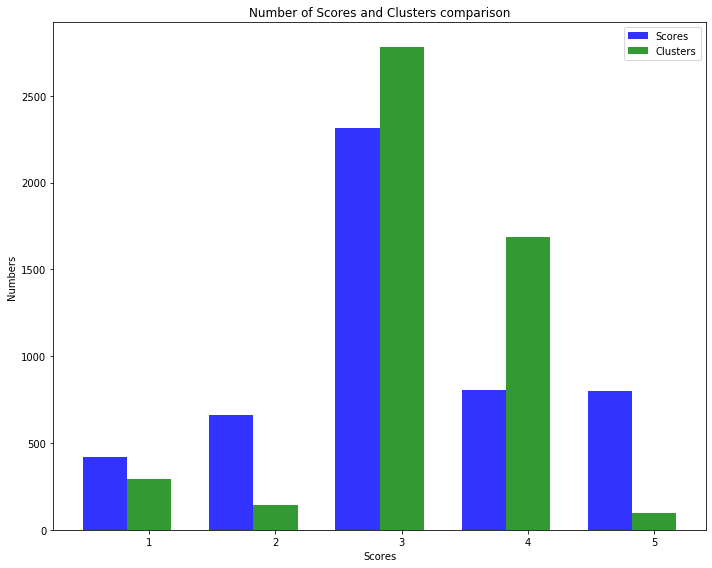

In [16]:
n_groups = 5
# create plot
fig = plt.figure(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Scores, bar_width,
alpha=opacity,
color='b',
label='Scores')

rects2 = plt.bar(index + bar_width, Cluster, bar_width,
alpha=opacity,
color='g',
label='Clusters')
plt.xlabel('Scores')
plt.ylabel('Numbers')
plt.title('Number of Scores and Clusters comparison')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()
plt.tight_layout()
plt.show()